# 机器学习——逻辑回归

## 1.导入库函数

In [48]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from matplotlib import rcParams

## 2.设置画图参数

In [49]:
config = {
    "mathtext.fontset":'stix',
    "font.family":'serif',
    "font.serif": ['SimHei'],
    "font.size": 10,   
    'axes.unicode_minus': False 
}
rcParams.update(config)  ## 设置画图的一些参数

## 3.导入数据并观察数据

In [50]:
data=pd.read_csv('ex2data1.csv')
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [51]:
data.describe()

,0,1,2
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


## 4.数据处理

### 分割标签和类别

In [52]:
X=data.iloc[:,0:data.shape[1]-1]
Y=data.iloc[:,data.shape[1]-1]

### 标准化处理

In [53]:
scaler = StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X))
X.head()#查看数据

,0,1
0,-1.602248,0.638341
1,-1.826256,-1.207541
2,-1.539040,0.361294
3,-0.282101,1.086368
4,0.691528,0.493378


### 添加偏置项

In [54]:
X.insert(0, 'Ones', 1)#让我们在训练集中添加一列，以便我们可以使用向量化的解决方案来计算代价和梯度。

### 划分训练集和测试集

In [55]:
np.random.seed(42)#固定随机种子，使每次运行结果一致
X_train_data = X.sample(frac=0.7)
Y_train_data=Y[X_train_data.index]
X_test_data = X.drop(X_train_data.index)
Y_test_data=Y.drop(X_train_data.index)

### 将数据转化为numpy数组

In [56]:
X_train_data=X_train_data.values
Y_train_data=(Y_train_data.values).reshape(-1,1)
X_test_data=X_test_data.values
Y_test_data=(Y_test_data.values).reshape(-1,1)

In [57]:
Y_train_data.shape

(70, 1)

## 5.构建逻辑回归模型

### 定义sigmoid函数
$$y=\frac{1}{1+e^{-x}}$$

In [58]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

### 定义损失函数
$$loss=-\left(\sum_{i=1}^ny_iln(p_i)+(1-y_i)ln(1-p_i)\right)$$

In [59]:
def computeCost(X_train_data,Y_train_data,X_test_data,Y_test_data,W):
    P_train=sigmoid(X_train_data@W)
    P_test=sigmoid(X_test_data@W)
    train_loss=-np.sum(Y_train_data.T@np.log(P_train)+(1-Y_train_data).T@np.log(1-P_train))/X_train_data.shape[0]
    test_loss=-np.sum(Y_test_data.T@np.log(P_test)+(1-Y_test_data).T@np.log(1-P_test))/X_test_data.shape[0]
    return train_loss,test_loss

### 定义梯度下降函数
$$W=W-\alpha \sum_{i=1}^n(p_i-y_i)\mathbf{x_i}$$

In [60]:
def gradientDecent(W,X,Y,alpha):
    error=sigmoid(X@W)-Y
    grad=(X.T@error)/X.shape[1]
    W-=alpha*grad
    return W

### 逻辑回归训练函数

In [61]:
def logisticRegression(X_train_data,Y_train_data,X_test_data,Y_test_data,alpha,iters):
    feature_dim=X.shape[1]
    train_loss_his=[]
    test_loss_his=[]
    W=np.zeros((feature_dim,1))
    for i in range(iters):
        train_loss,test_loss=computeCost(X_train_data,Y_train_data,X_test_data,Y_test_data,W)
        train_loss_his.append(train_loss)
        test_loss_his.append(test_loss)
        W=gradientDecent(W,X_train_data,Y_train_data,alpha)
    return train_loss_his,test_loss_his,W
        

### 定义模型预测函数

In [117]:
def predict(W,X,threshold):
    pro=sigmoid(X@W)
    y_hat=(pro>=threshold).astype(int)
    return pro,y_hat

## 6.进行模型训练

In [118]:
alpha =0.01
iters = 10000
R=0.001
train_loss_his,test_loss_his, W = logisticRegression(X_train_data,Y_train_data,X_test_data,Y_test_data, alpha, iters)

### 绘画损失曲线

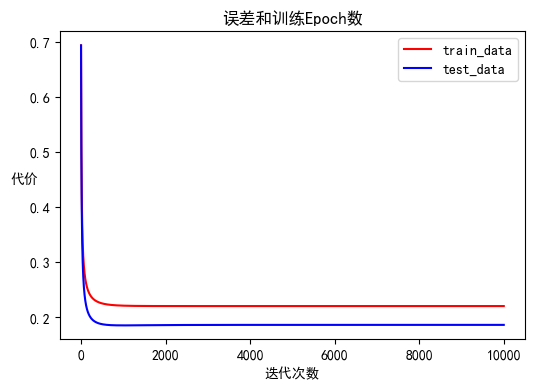

In [119]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(np.arange(iters), train_loss_his, 'r',label='train_data')
ax.plot(np.arange(iters), test_loss_his, 'b',label='test_data')

ax.set_xlabel('迭代次数')
ax.set_ylabel('代价', rotation=0)
ax.set_title('误差和训练Epoch数')
ax.legend()
plt.show()

### 计算评价指标

In [120]:
recall=[]
precision=[]
TPR=[]
FPR=[]
F1_score=[]

In [121]:
pro,y_hat=predict(W,X_test_data,0.5)
pro=pro.reshape(-1)
arr=np.copy(pro)
arr.reshape(-1)
arr.sort()
sorted_indices = np.argsort(arr)[::-1]
arr = arr[sorted_indices]
for i in arr:
    tp=0
    fn=0
    fp=0
    tn=0
    for j in range(Y_test_data.shape[0]):
        if(Y_test_data[j][0]==1) and (pro[j]>=i):
            tp=tp+1;
        elif(Y_test_data[j][0]==1) and (pro[j]<i):
            fn=fn+1
        elif(Y_test_data[j][0]==0) and (pro[j]>=i):
            fp=fp+1
        else:
            tn=tn+1
    x=float(tp)/(tp+fn)
    y=float(tp)/(tp+fp)
    fpr=float(fp)/(tn+fp)
    recall.append(x)
    precision.append(y)
    TPR.append(x)
    FPR.append(fpr)
    F1_score.append(2*x*y/(x+y))

In [122]:
y_hat

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0]])

In [123]:
FPR

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.07692307692307693,
 0.15384615384615385,
 0.23076923076923078,
 0.23076923076923078,
 0.3076923076923077,
 0.38461538461538464,
 0.46153846153846156,
 0.5384615384615384,
 0.6153846153846154,
 0.6923076923076923,
 0.7692307692307693,
 0.8461538461538461,
 0.9230769230769231,
 1.0]

### 绘制PR曲线

Text(0.5, 0, 'Recall')

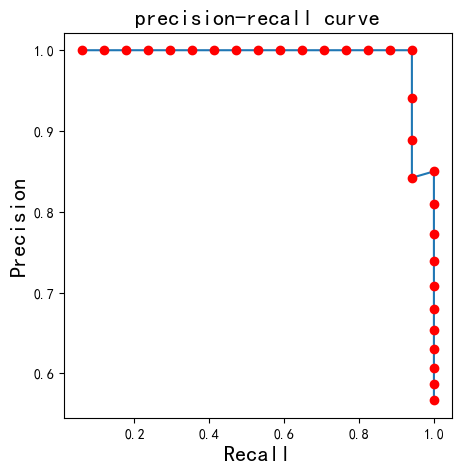

In [124]:
plt.figure(figsize=(5,5))
plt.title('precision-recall curve',fontsize=16)
plt.plot(recall,precision)
plt.plot(recall,precision,'ro')
plt.ylabel('Precision',fontsize=16)
plt.xlabel('Recall',fontsize=16)

### 绘制ROC曲线

Text(0.5, 0, 'FPR')

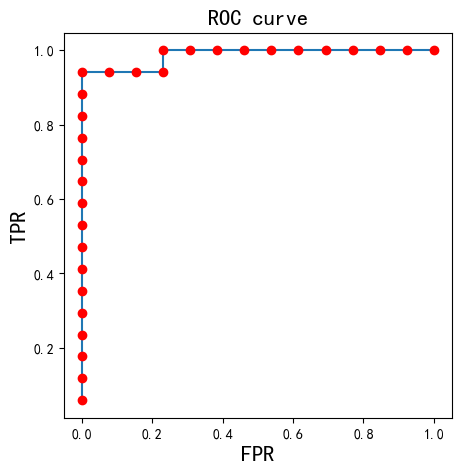

In [125]:
plt.figure(figsize=(5,5))
plt.title('ROC curve',fontsize=16)
plt.plot(FPR,TPR)
plt.plot(FPR,TPR,'ro')
plt.ylabel('TPR',fontsize=16)
plt.xlabel('FPR',fontsize=16)

### 计算AUC

In [126]:
auc=0
for i in range(len(pro)-1):
    auc=auc+(FPR[i+1]-FPR[i])*(TPR[i+1]+TPR[i])
auc=float(auc)/2
print("auc=%.2f"%auc)

auc=0.99


In [127]:
print(F1_score)

[0.1111111111111111, 0.21052631578947367, 0.3, 0.38095238095238093, 0.45454545454545453, 0.5217391304347826, 0.5833333333333334, 0.6399999999999999, 0.6923076923076924, 0.7407407407407407, 0.7857142857142858, 0.8275862068965517, 0.8666666666666666, 0.9032258064516129, 0.9375, 0.9696969696969697, 0.9411764705882353, 0.9142857142857143, 0.8888888888888888, 0.9189189189189189, 0.8947368421052632, 0.8717948717948718, 0.85, 0.8292682926829268, 0.8095238095238095, 0.7906976744186047, 0.7727272727272727, 0.7555555555555554, 0.7391304347826086, 0.7234042553191489]
